# Visual Exploration of Data - Assignment 1

You find yourself working as newly-hired intern for the United States Transportation Security Administration, (TSA). You receive communications from management indicating that various other stakeholders have expressed interest in data regardings claims filed with the agency. In particular, they express interest in learning more about <u>the distribution of settlement-closure costs</u>, and request that you produce a notebook with visualizations that can lead discussions about processing claims in a forthcoming meeting.

Elements requested by staff include:
- Violin plots comparing the distribution of settlement/closure amounts based on "Disposition" in 2014 (excluding those that were "denied") (claims-2014.csv dataset).
- A bar plot depicting the total settlement cost of each month in 2014 (based on the Incident Date) (claims-2014.csv dataset).
- Boxplots comparing settlement/closure amounts of the airports that incurred the <u>highest settlement totals</u> in 2015 (claims-2015.csv dataset). <i>Be conscious of the amount of airports you are choosing to visualize</i>.
- An appropriate visualization / plotting method of your choice that compares the total number of claims occurring in each month of 2015 to the total number of claims occurring in each month in 2014 (both datasets).
- A justification regarding why your visualization / plotting method appropriately compares the total number of claims occurring in each month of 2015 to the total number of claims occurring in each month in 2014.

<i>Side Note: This data, as well as comparable data for other years, can be obtained from the TSA website: [here](https://www.dhs.gov/tsa-claims-data).

The files bundled with this assignment are converted to CSV for your convenience and have been slightly cleaned.</i> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df14 = pd.read_csv("assets/claims-2014.csv")
df15 = pd.read_csv("assets/claims-2015.csv")

#create a function which converts the Incident Date column to a datetime object and also adds a column which includes
#the month name
def add_month(df, column):
    df[column] = pd.to_datetime(df[column])
    df['Incident Month'] = df[column].dt.month_name()
    return df
df14 = add_month(df14, 'Incident Date')
df15 = add_month(df15, 'Incident D')

# Part 1 - Violin Plot - Distribution of settlement/closure amounts based on Disposition
Remember, do not include data where the claim was denied

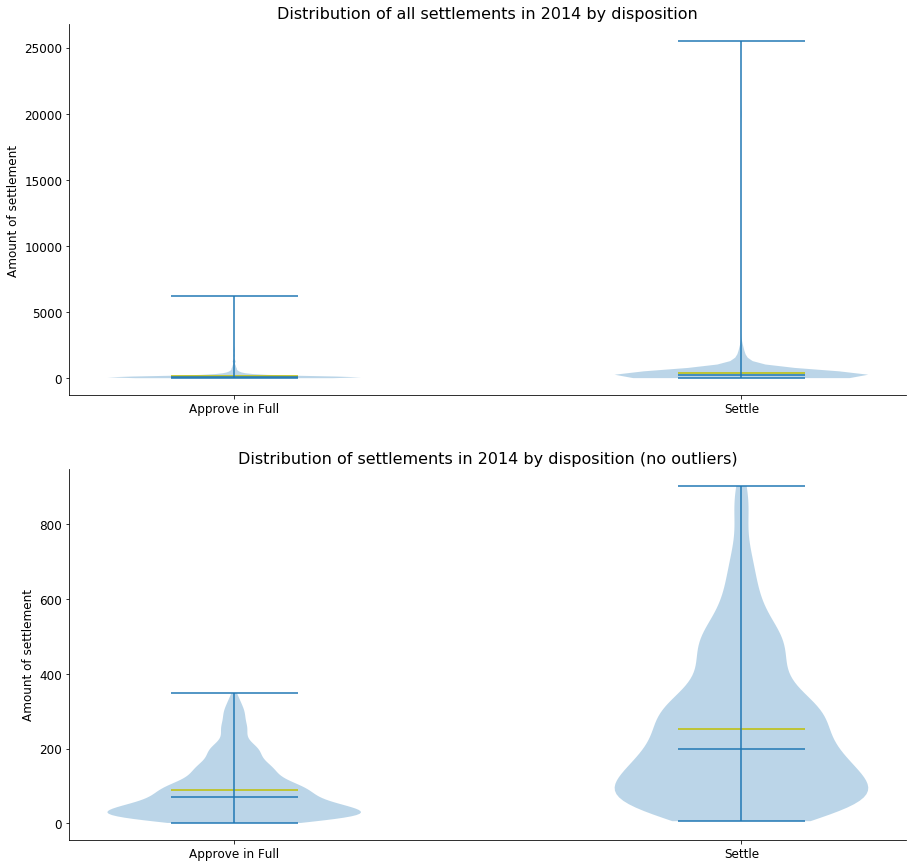

In [3]:
#create a copy of the df14 dataframe
part1_df14 = df14.copy()

#remove any deny or '-' disposition from the dataframe. Removed '-' because there is no way to know if the disposition
#is supposed to be settle, deny, or approve and the close amount value is also missing
part1_df14 = part1_df14[(part1_df14['Disposition'] != '-') & (part1_df14['Disposition'] != 'Deny')]

#convert close amounts to floats
part1_df14['Close Amount'] = part1_df14['Close Amount'].astype(float)

#create lists of dispositions
dispositions = list(part1_df14['Disposition'].unique())

#create a list of 2 lists which include the close amounts for each disposition
close_amounts = []
for dispo in dispositions:
    data = list(part1_df14[part1_df14['Disposition'] == dispo]['Close Amount'])
    close_amounts.append(data) 

#create the violinplot
fig, (ax, ax2) = plt.subplots(2,1)
vplt = ax.violinplot(close_amounts, showmeans = True, showmedians = True)

#customize appearance
vplt['cmeans'].set_color('y')
ax.set_title('Distribution of all settlements in 2014 by disposition', fontsize = 16, horizontalalignment = 'center')
ax.set_ylabel('Amount of settlement', fontsize = 12)
ax.set_xticks(np.arange(1, len(dispositions) + 1)) #looked up how to set the xticks in the matplotlib documentation: https://matplotlib.org/3.1.1/gallery/statistics/customized_violin.html
ax.set_xticklabels(dispositions)
ax.tick_params(axis = 'both', labelsize = 12)
ax.spines['top'].set_visible(False) #found code for this from stackoverflow: https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax.spines['right'].set_visible(False) #found code for this from stackoverflow (same link as above)


#create a second violinplot with outliers removed to be able to see distribution of the rest of the data more clearly 
#find the IQR for both the approve and settle dispositions
Q1_Approve = part1_df14[part1_df14['Disposition'] == 'Approve in Full']['Close Amount'].quantile(.25)
Q3_Approve = part1_df14[part1_df14['Disposition'] == 'Approve in Full']['Close Amount'].quantile(.75)
IQR_Approve = Q3_Approve - Q1_Approve

Q1_settle = part1_df14[part1_df14['Disposition'] == 'Settle']['Close Amount'].quantile(.25)
Q3_settle = part1_df14[part1_df14['Disposition'] == 'Settle']['Close Amount'].quantile(.75)
IQR_settle = Q3_settle - Q1_settle 

#remove outliers from the close amounts. Only removed outliers on the high end because Q1-IQR * 1.5 is a negative value
#and 0 is the lowest possible value so there are no outliers on the low end.
#used the following article to determine what should be considered an outlier: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
approve_no_outliers = list(part1_df14[(part1_df14['Disposition'] == 'Approve in Full') 
                                  &(part1_df14['Close Amount'] < (Q3_Approve + IQR_Approve * 1.5))]['Close Amount'])

settle_no_outliers = list(part1_df14[(part1_df14['Disposition'] == 'Settle')  
                                  &(part1_df14['Close Amount'] < (Q3_settle + IQR_settle * 1.5))]['Close Amount'])

#create list to use for the violinplot
approve_settle = [approve_no_outliers, settle_no_outliers]

#create the violinplot
vplt2 = ax2.violinplot(approve_settle, showmeans = True, showmedians = True)

#customize the plot
vplt2['cmeans'].set_color('y')
ax2.set_title('Distribution of settlements in 2014 by disposition (no outliers)', fontsize = 16, horizontalalignment = 'center')
ax2.set_ylabel('Amount of settlement', fontsize = 12)
ax2.set_xticks(np.arange(1, len(dispositions) + 1)) 
ax2.set_xticklabels(dispositions)
ax2.tick_params(axis = 'both', labelsize=12)
ax2.spines['top'].set_visible(False) #found code for this from stackoverflow: https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax2.spines['right'].set_visible(False) #found code for this from stackoverflow (same link as above)

plt.gcf().set_size_inches(15, 15)
plt.show()

The top violinplot includes the entire data set. Due to the fact there are several large outliers it is hard to see the shape of the bulk of the data. I decided to create a second violinplot with the outliers removed, using the IQR, in order to get a better idea of the distribution of the rest of the data.

***
# Part 2 - Bar plot - Total Damages per Month based on Incident Date 

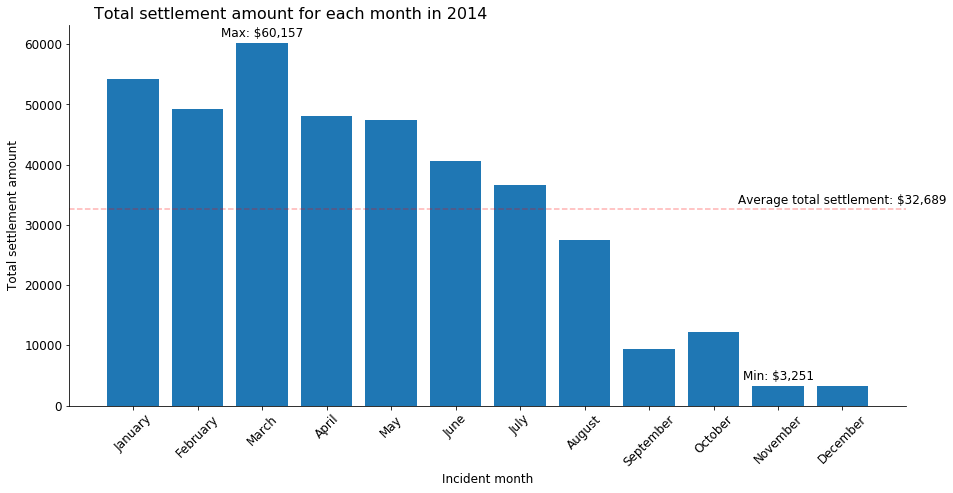

In [7]:
#create a copy of the df14 dataframe
part2_df14 = df14.copy()

#remove any deny or '-' disposition from the dataframe. Deny is all zero values so don't need it
part2_df14 = part2_df14[(part2_df14['Disposition'] != '-') & (part2_df14['Disposition'] != 'Deny')]

#filter out data where the incident did not occur in 2014
part2_df14 = part2_df14[part2_df14['Incident Date'].dt.year == 2014]

#convert close amounts to flots
part2_df14['Close Amount'] = part2_df14['Close Amount'].astype(float)

#group data by Incident Month and sum together the Close Amounts
grouped_data = part2_df14.groupby('Incident Month').agg({'Close Amount': np.sum})

#reindex the grouped_data dataframe so the data is in order of months of the year
grouped_data = grouped_data.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                                    'October', 'November', 'December'])

#create x-axis labels and bar heights
x_axis = list(grouped_data.index)
bar_heights = list(grouped_data['Close Amount'])

#Create the barplot
fig, ax = plt.subplots()
ax.bar(x_axis, bar_heights)

#add labels to the barplot
ax.set_xlabel('Incident month', fontsize = 12)
ax.set_ylabel('Total settlement amount', fontsize = 12)
ax.set_title('Total settlement amount for each month in 2014', fontsize = 16, horizontalalignment = 'right')
ax.tick_params(axis = 'x', labelrotation = 45, labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

#annotate the Max and Min values on the bar chart
max_value = grouped_data['Close Amount'].max()
max_month = grouped_data[grouped_data['Close Amount'] == max_value].index[0]
min_value = grouped_data['Close Amount'].min()
min_month = grouped_data[grouped_data['Close Amount'] == min_value].index[0]
plt.annotate('Max: ${:,.0f}'.format(max_value), xy = (max_month,max_value + 1000), xycoords = 'data', horizontalalignment = 'center', fontsize = 12)
plt.annotate('Min: ${:,.0f}'.format(min_value), xy = (min_month, min_value + 1000), xycoords = 'data', horizontalalignment = 'center', fontsize = 12)

#annotate the average value
average = grouped_data['Close Amount'].mean()
plt.axhline(average, 0 , 1, color = 'red', alpha = .3, linestyle = 'dashed')
plt.annotate('Average total settlement: ${:,.0f}'.format(average), xy = ('December', average + 800), xycoords = 'data', horizontalalignment = 'center', fontsize = 12)

#change size of figure and remove top and right frame lines
plt.gcf().set_size_inches(15, 7)
ax.spines['top'].set_visible(False) #found code for this from stackoverflow https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax.spines['right'].set_visible(False) #found code for this from stackoverflow (same link as above)
plt.show()


***
# Part 3 - Boxplots - Top N Airports with Highest Total Settlement Amounts

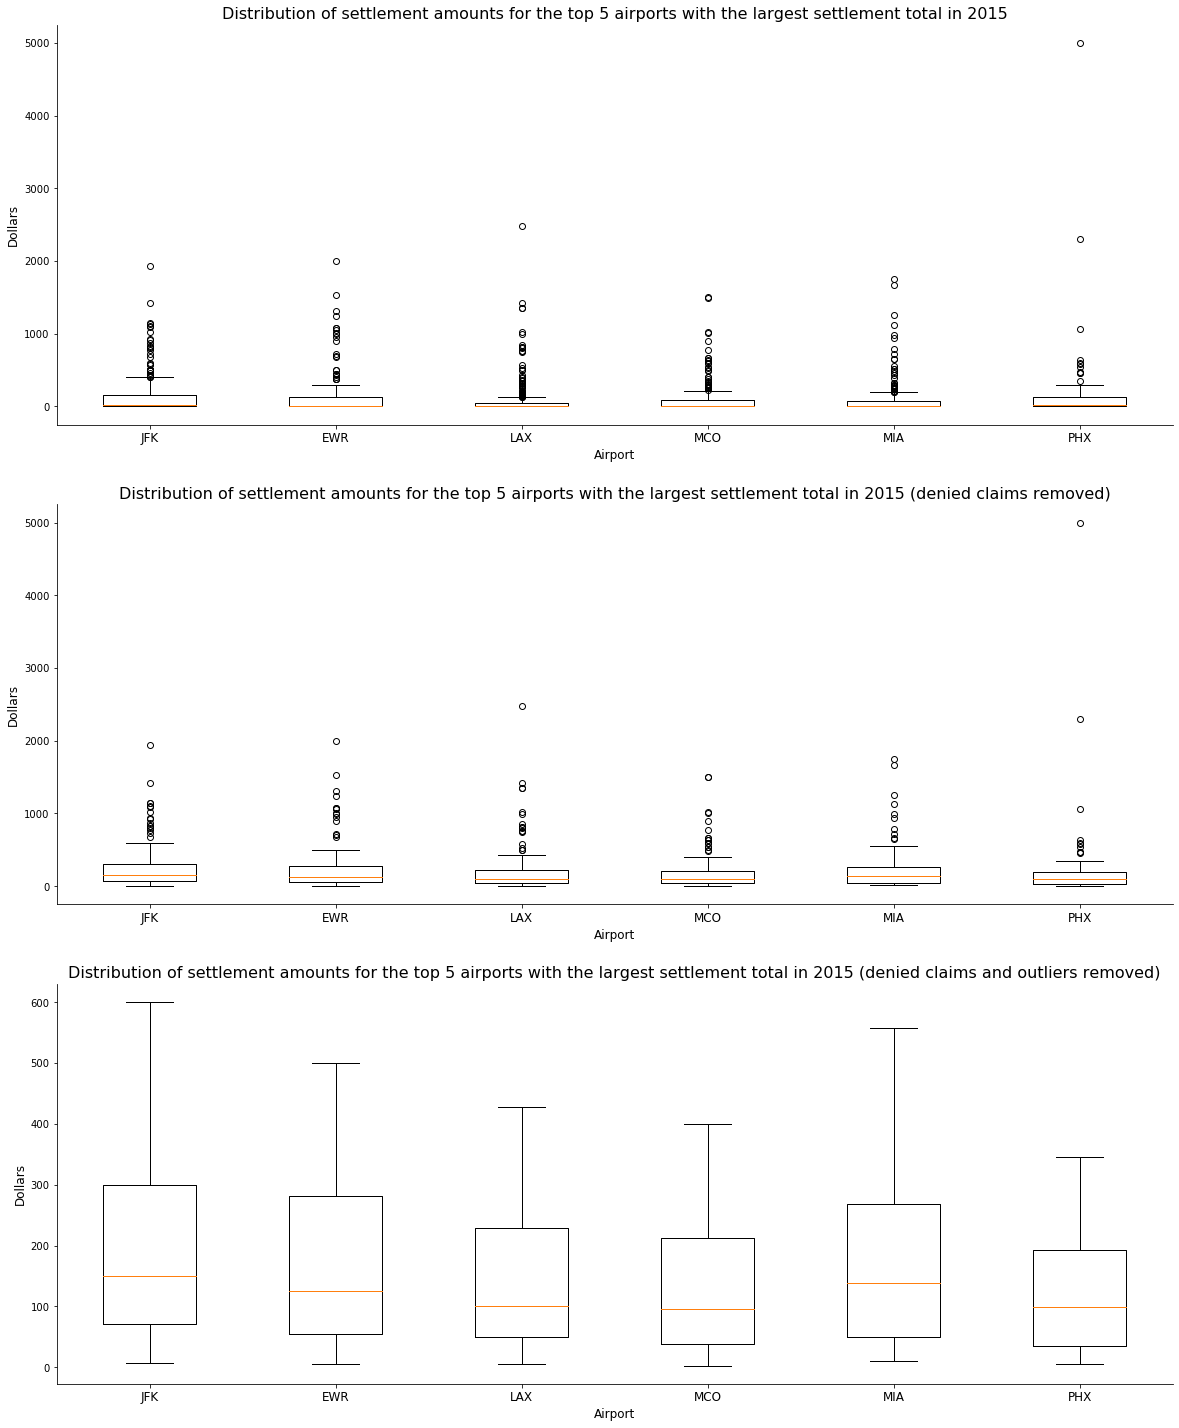

In [9]:
#make a copy of the dataframe
part3_df15 = df15.copy()

#remove '-' disposition since we don't know if they were approved, denied, or settled and there is no close amount
part3_df15 = part3_df15[part3_df15['Disposition'] != '-']

#convert close amounts to floats
part3_df15['Close Amount'] = part3_df15['Close Amount'].astype(float)

#create a dataframe which includes the airports and the total settlement amounts to determine which airports to include
#in the boxplot
airport_df = part3_df15.groupby('Airport Code').agg({'Close Amount': np.sum}).sort_values('Close Amount', ascending = False)

#make a list of the top 5 airport names which will be used to make the boxplot. Used 5 because this is a manageable number
#to plot and in my experience people are usually interested in the top 5 to 10
top_airports = list(airport_df.index)[0:6]

#create a list of lists which include close amounts for each airport
all_close_amounts = []
for airport in top_airports:
    close_amounts = list(part3_df15[part3_df15['Airport Code'] == airport]['Close Amount'])
    all_close_amounts.append(close_amounts)

#create the boxplot
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.boxplot(all_close_amounts)

#add labels
ax1.set_xticklabels(top_airports, fontsize = 12)
ax1.set_xlabel('Airport', fontsize = 12)
ax1.set_ylabel('Dollars', fontsize = 12)
ax1.set_title('Distribution of settlement amounts for the top 5 airports with the largest settlement total in 2015', fontsize = 16)

#remove top and right frame
ax1.spines['top'].set_visible(False) #found code for this from stackoverflow https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax1.spines['right'].set_visible(False) #found code for this from stackoverflow (same link as above)


#create another boxplot with denied claims removed. 
#Filtered out denied claims since they are all $0 and this skews the distribution of actual dollar amounts which were awarded.

#removed the denied claims
number_denials = len(part3_df15[part3_df15['Disposition'] == 'Deny'])
part3_df15 = part3_df15[part3_df15['Disposition'] != 'Deny']

#create a list of lists which include all the data for each airport
all_close_amounts = []
for airport in top_airports:
    close_amounts = list(part3_df15[part3_df15['Airport Code'] == airport]['Close Amount'])
    all_close_amounts.append(close_amounts)
    
#create the other boxplot
ax2.boxplot(all_close_amounts)

#add labels
ax2.set_xticklabels(top_airports, fontsize = 12)
ax2.set_xlabel('Airport', fontsize = 12)
ax2.set_ylabel('Dollars', fontsize = 12)
ax2.set_title('Distribution of settlement amounts for the top 5 airports with the largest settlement total in 2015 (denied claims removed)', fontsize = 16)

#remove top and right frame
ax2.spines['top'].set_visible(False) #found code for this from stackoverflow https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax2.spines['right'].set_visible(False) #found code for this from stackoverflow (same link as above)

#create a third chart with outliers removed to be able to see the distribution of the typical close amounts more clearly
ax3.boxplot(all_close_amounts, showfliers = False)

#add labels
ax3.set_xticklabels(top_airports, fontsize = 12)
ax3.set_xlabel('Airport', fontsize = 12)
ax3.set_ylabel('Dollars', fontsize = 12)
ax3.set_title('Distribution of settlement amounts for the top 5 airports with the largest settlement total in 2015 (denied claims and outliers removed)', fontsize = 16)

#remove top and right frame
ax3.spines['top'].set_visible(False) #found code for this from stackoverflow https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax3.spines['right'].set_visible(False) #found code for this from stackoverflow (same link as above)
    
plt.gcf().set_size_inches(20,25)
plt.show()

The first chart shows the distributions of approved, settled, and denied claims for the top 5 airports with the highest total claims. There were 3574 denied claims included in the data. All denied claims paid out nothing so this is why the boxplots are skewed toward $0.   

The second chart shows the distribution of only approved or settled claims for the top 5 airports. The removal of denied claims means the boxplots show the distribution of actual money being paid out.  

The third chart also removes outliers from the top 5 airports in order to get a better idea of the distribution of the majority of the data.

Both charts show data from the "assets/claims-2015.csv" data regardless of incident year because all of the received dates are in 2015. It is assumed all of these claims were paid in 2015 even if the incident date was years prior and since I am plotting distribution of claim amounts paid in 2015 I included all the data. The only claims which were not included are those which a disposition was listed as '-' since there were no claim amounts and no way to tell if the claim was denied, settled, or approved.

***
# Part 4 - Your Choice Visualization - Comparing total number of claims per month, 2014 and 2015 

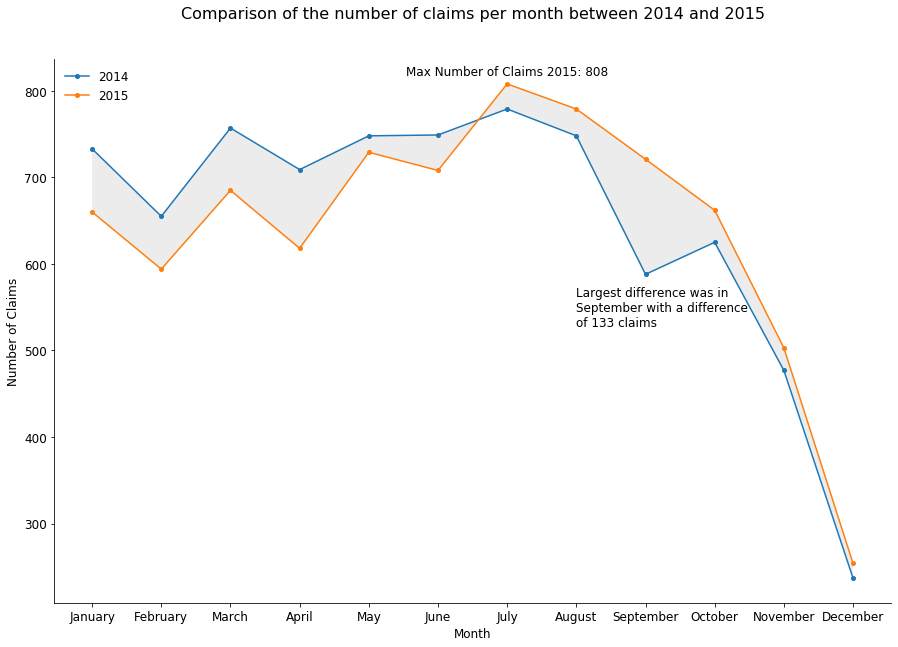

In [16]:
#make a copy of both dataframes
part4_df14 = df14.copy()
part4_df15 = df15.copy()

#filter out any data where the incident date does not match the year for the dataframe since I want to compare the number
#of incidents that happened each month for each year. I included all claims even if the disposition was deny or '-' because
#they were still a claim which was filed and I want to look at the total number of claims filed per month.
part4_df14 = part4_df14[part4_df14['Incident Date'].dt.year == 2014]
part4_df15 = part4_df15[part4_df15['Incident D'].dt.year == 2015]

#create new data frames for each year which groups the months together and shows the counts for
#the number of claims for each month. Reindex the dataframes so the months are in the correct order
#Also create a list of the total number of claims per month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
def claims_data(df, months):
    new_df = df.groupby('Incident Month').agg({'Claim Number': np.size}).reindex(months)
    return new_df, list(new_df['Claim Number'])

#create a data frame and list for each year
df14_months, claims_14 = claims_data(part4_df14, months)
df15_months, claims_15 = claims_data(part4_df15, months)

#create the line graph
fig, ax = plt.subplots()
plt.plot(months, claims_14, marker = 'o', markersize = 4)
plt.plot(months, claims_15, marker = 'o', markersize = 4)
plt.gca().fill_between(months,claims_14,claims_15, facecolor = 'grey', alpha = .15)
plt.gcf().set_size_inches(15,10)

#add labels and change fontsizes 
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Number of Claims', fontsize = 12)
plt.title('Comparison of the number of claims per month between 2014 and 2015\n\n', fontsize = 16, horizontalalignment = 'center')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(['2014', '2015'], fontsize = 12, frameon=False, loc = 2)

#remove top and right part of frame
ax.spines['top'].set_visible(False) #found code for this from stackoverflow https://stackoverflow.com/questions/14908576/how-to-remove-frame-from-matplotlib-pyplot-figure-vs-matplotlib-figure-frame
ax.spines['right'].set_visible(False) #found code for this from stackoverflow (same link as above)

#annotate the Max value on the bar chart
max_value15 = max(claims_15)
max_month15 = df15_months[df15_months['Claim Number'] == max_value15].index[0]
plt.annotate('Max Number of Claims 2015: {:.0f}'.format(max_value15), xy = (max_month15,max_value15 + 10), xycoords = 'data', horizontalalignment = 'center', fontsize = 12)

#annotate the month with the biggest difference between the two years
combo_df = df14_months.copy()
combo_df['Claims 2015'] = df15_months['Claim Number']
combo_df['Absolute Difference'] = combo_df.apply(lambda x: np.abs(x['Claim Number'] - x['Claims 2015']), axis = 1)
largest_diff = combo_df['Absolute Difference'].max()
largest_diff_month = combo_df[combo_df['Absolute Difference'] == largest_diff].index[0]
y = df14_months.loc[largest_diff_month,'Claim Number']
plt.annotate('Largest difference was in \n{} with a difference \nof {:.0f} claims'.format(largest_diff_month, largest_diff),
            xy=('August', y-60), xycoords = 'data', fontsize = 12)
plt.show()

I used a line plot to show the difference between the number of claims in each month for 2014 and 2015. I believe this plot appropriately compares the total number of claims occurring in each month of 2015 to the total number of claims occurring in each month in 2014 because the line plot visually displays each year as its own line, side by side, which allows for easy comparison between the two years. The lines emphasize the peaks and valleys in the number of claims for each month for each year while the fill-between feature further emphasizes the differences between the months for each year because it creates a shape of the differences which stands out from the background. For example it is easy to see that in September the difference between 2014 and 2015 claims was much larger than at any other point because the shape of the grey is much wider at this point. It is also easy to see from the line plot when there is a large shift in the data. For instance, starting in July 2015 there is a shift from the 2014 months having the most claims to 2015 having more claims. The line plot also lends itself well to this type of data because I am plotting claims over time. Not only can I easily see the differences between the two years but I can also see how the number of claims trends from month to month for each year. I also included several annotations of information I believe is important for the customer such as markers for every month to make it clear where each month lands, the maximum number of claims in one month over all the months, as well as what month had the biggest difference between the two years.